# RENEWIND - NEURAL NETWORKS

## Problem Statement

## *Importing Package*

In [1]:
!pip install tensorflow

In [2]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.5 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

import tensorflow as tf
import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

from tensorflow.keras.metrics import Precision, Recall, AUC
from tensorflow.keras.regularizers import l1,l2
from sklearn.utils.class_weight import compute_class_weight
from keras_tuner import RandomSearch, Hyperband, BayesianOptimization
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score,precision_recall_curve
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.model_selection import train_test_split
from keras_tuner import Objective

#from tensorflow_addons.metrics import F1Score


## MOUNTING GOOGLE COLAB
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/MyDrive/PGP_AI_ML_GREAT_LEARNING/04_Introduction To Neural Network/Final_Project/
!ls

Mounted at /content/drive/
/content/drive/MyDrive/PGP_AI_ML_GREAT_LEARNING/04_Introduction To Neural Network/Final_Project
'Problem Statement.docx'   ReneWind   ReneWind_v1_0.ipynb   sgd.png   Test.csv	 Train.csv


#Dataset Load And Overview

In [4]:
class DatasetLoadAndOverview:
  def __init__(self):
    self.df_Train = pd.read_csv('Train.csv')
    self.df_Test = pd.read_csv('Test.csv')

  def LoadDataset(self):
    return self.df_Train, self.df_Test

  def DataSetOverView(self):
    df_overview = pd.DataFrame()
    df_overview_train = pd.DataFrame({'Type':['Train'],'Rows':[self.df_Train.shape[0]],'Columns':[self.df_Train.shape[1]],
                                      'Sum_of_Null':[self.df_Train.isnull().sum().sum()] , 'Duplicate_Entry_Count':[self.df_Train.duplicated().sum()]

                                      })
    df_overview_test = pd.DataFrame({'Type':['Test'], 'Rows':[self.df_Test.shape[0]], 'Columns':[self.df_Test.shape[1]],
                                     'Sum_of_Null':[self.df_Test.isnull().sum().sum()] , 'Duplicate_Entry_Count':[self.df_Test.duplicated().sum()]
                                    })

    df_overview = pd.concat([df_overview_train,df_overview_test],axis=0)
    return df_overview


ovObject = DatasetLoadAndOverview()
df_Train, df_Test = ovObject.LoadDataset()

In [5]:
ovObject.DataSetOverView()

,Type,Rows,Columns,Sum_of_Null,Duplicate_Entry_Count
0,Train,20000,41,36,0
0,Test,5000,41,11,0


## Train dataset OverView

In [6]:
df_Train.describe().round().T

,count,mean,std,min,25%,50%,75%,max
V1,19982.0,-0.0,3.0,-12.0,-3.0,-1.0,2.0,15.0
V2,19982.0,0.0,3.0,-12.0,-2.0,0.0,3.0,13.0
V3,20000.0,2.0,3.0,-11.0,0.0,2.0,5.0,17.0
V4,20000.0,-0.0,3.0,-15.0,-2.0,-0.0,2.0,13.0
V5,20000.0,-0.0,2.0,-9.0,-2.0,-0.0,1.0,8.0
V6,20000.0,-1.0,2.0,-10.0,-2.0,-1.0,0.0,7.0
V7,20000.0,-1.0,2.0,-8.0,-2.0,-1.0,0.0,8.0
V8,20000.0,-1.0,3.0,-16.0,-3.0,-0.0,2.0,12.0
V9,20000.0,-0.0,2.0,-9.0,-1.0,-0.0,1.0,8.0
V10,20000.0,-0.0,2.0,-10.0,-1.0,0.0,1.0,8.0


In [7]:
df_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      19982 non-null  float64
 1   V2      19982 non-null  float64
 2   V3      20000 non-null  float64
 3   V4      20000 non-null  float64
 4   V5      20000 non-null  float64
 5   V6      20000 non-null  float64
 6   V7      20000 non-null  float64
 7   V8      20000 non-null  float64
 8   V9      20000 non-null  float64
 9   V10     20000 non-null  float64
 10  V11     20000 non-null  float64
 11  V12     20000 non-null  float64
 12  V13     20000 non-null  float64
 13  V14     20000 non-null  float64
 14  V15     20000 non-null  float64
 15  V16     20000 non-null  float64
 16  V17     20000 non-null  float64
 17  V18     20000 non-null  float64
 18  V19     20000 non-null  float64
 19  V20     20000 non-null  float64
 20  V21     20000 non-null  float64
 21  V22     20000 non-null  float64
 22

## Test Overview

In [8]:
df_Test.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,4995.0,-0.277622,3.466280,-12.381696,-2.743691,-0.764767,1.831313,13.504352
V2,4994.0,0.397928,3.139562,-10.716179,-1.649211,0.427369,2.444486,14.079073
V3,5000.0,2.551787,3.326607,-9.237940,0.314931,2.260428,4.587000,15.314503
V4,5000.0,-0.048943,3.413937,-14.682446,-2.292694,-0.145753,2.166468,12.140157
V5,5000.0,-0.080120,2.110870,-7.711569,-1.615238,-0.131890,1.341197,7.672835
V6,5000.0,-1.042138,2.005444,-8.924196,-2.368853,-1.048571,0.307555,5.067685
V7,5000.0,-0.907922,1.769017,-8.124230,-2.054259,-0.939695,0.212228,7.616182
V8,5000.0,-0.574592,3.331911,-12.252731,-2.642088,-0.357943,1.712896,10.414722
V9,5000.0,0.030121,2.174139,-6.785495,-1.455712,-0.079891,1.449548,8.850720
V10,5000.0,0.018524,2.145437,-8.170956,-1.353320,0.166292,1.511248,6.598728


In [9]:
df_Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      4995 non-null   float64
 1   V2      4994 non-null   float64
 2   V3      5000 non-null   float64
 3   V4      5000 non-null   float64
 4   V5      5000 non-null   float64
 5   V6      5000 non-null   float64
 6   V7      5000 non-null   float64
 7   V8      5000 non-null   float64
 8   V9      5000 non-null   float64
 9   V10     5000 non-null   float64
 10  V11     5000 non-null   float64
 11  V12     5000 non-null   float64
 12  V13     5000 non-null   float64
 13  V14     5000 non-null   float64
 14  V15     5000 non-null   float64
 15  V16     5000 non-null   float64
 16  V17     5000 non-null   float64
 17  V18     5000 non-null   float64
 18  V19     5000 non-null   float64
 19  V20     5000 non-null   float64
 20  V21     5000 non-null   float64
 21  V22     5000 non-null   float64
 22  

## Impute the Missing value


In [10]:
df_cleaned_Train = df_Train.dropna()
df_cleaned_Test = df_Test.dropna()

In [11]:
df_cleaned_Train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19964 entries, 0 to 19999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      19964 non-null  float64
 1   V2      19964 non-null  float64
 2   V3      19964 non-null  float64
 3   V4      19964 non-null  float64
 4   V5      19964 non-null  float64
 5   V6      19964 non-null  float64
 6   V7      19964 non-null  float64
 7   V8      19964 non-null  float64
 8   V9      19964 non-null  float64
 9   V10     19964 non-null  float64
 10  V11     19964 non-null  float64
 11  V12     19964 non-null  float64
 12  V13     19964 non-null  float64
 13  V14     19964 non-null  float64
 14  V15     19964 non-null  float64
 15  V16     19964 non-null  float64
 16  V17     19964 non-null  float64
 17  V18     19964 non-null  float64
 18  V19     19964 non-null  float64
 19  V20     19964 non-null  float64
 20  V21     19964 non-null  float64
 21  V22     19964 non-null  float64
 22  V23

In [12]:
df_cleaned_Test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4989 entries, 0 to 4999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      4989 non-null   float64
 1   V2      4989 non-null   float64
 2   V3      4989 non-null   float64
 3   V4      4989 non-null   float64
 4   V5      4989 non-null   float64
 5   V6      4989 non-null   float64
 6   V7      4989 non-null   float64
 7   V8      4989 non-null   float64
 8   V9      4989 non-null   float64
 9   V10     4989 non-null   float64
 10  V11     4989 non-null   float64
 11  V12     4989 non-null   float64
 12  V13     4989 non-null   float64
 13  V14     4989 non-null   float64
 14  V15     4989 non-null   float64
 15  V16     4989 non-null   float64
 16  V17     4989 non-null   float64
 17  V18     4989 non-null   float64
 18  V19     4989 non-null   float64
 19  V20     4989 non-null   float64
 20  V21     4989 non-null   float64
 21  V22     4989 non-null   float64
 22  V23  

In [13]:
df_cleaned_Train.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,19964.0,-0.271156,3.442155,-11.876451,-2.737380,-0.746118,1.841050,15.493002
V2,19964.0,0.440507,3.150895,-12.319951,-1.640580,0.470788,2.544489,13.089269
V3,19964.0,2.485454,3.390736,-10.708139,0.207329,2.255786,4.569975,17.090919
V4,19964.0,-0.082647,3.432260,-15.082052,-2.345815,-0.135241,2.130757,13.236381
V5,19964.0,-0.055028,2.105122,-8.603361,-1.537210,-0.103365,1.339176,8.133797
V6,19964.0,-0.995463,2.041211,-10.227147,-2.347919,-1.000852,0.380444,6.975847
V7,19964.0,-0.879029,1.761840,-7.949681,-2.031207,-0.917179,0.223695,8.006091
V8,19964.0,-0.548384,3.296765,-15.657561,-2.647433,-0.390276,1.726303,11.679495
V9,19964.0,-0.016578,2.161033,-8.596313,-1.495193,-0.066895,1.409579,8.137580
V10,19964.0,-0.012416,2.193498,-9.853957,-1.412478,0.102264,1.477754,8.108472


In [14]:
df_cleaned_Train.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,19964.0,-0.271156,3.442155,-11.876451,-2.737380,-0.746118,1.841050,15.493002
V2,19964.0,0.440507,3.150895,-12.319951,-1.640580,0.470788,2.544489,13.089269
V3,19964.0,2.485454,3.390736,-10.708139,0.207329,2.255786,4.569975,17.090919
V4,19964.0,-0.082647,3.432260,-15.082052,-2.345815,-0.135241,2.130757,13.236381
V5,19964.0,-0.055028,2.105122,-8.603361,-1.537210,-0.103365,1.339176,8.133797
V6,19964.0,-0.995463,2.041211,-10.227147,-2.347919,-1.000852,0.380444,6.975847
V7,19964.0,-0.879029,1.761840,-7.949681,-2.031207,-0.917179,0.223695,8.006091
V8,19964.0,-0.548384,3.296765,-15.657561,-2.647433,-0.390276,1.726303,11.679495
V9,19964.0,-0.016578,2.161033,-8.596313,-1.495193,-0.066895,1.409579,8.137580
V10,19964.0,-0.012416,2.193498,-9.853957,-1.412478,0.102264,1.477754,8.108472


# DataSplit and Scaling

In [15]:
class DatasetSplitAndScale:
  def __init__(self, df_Train, df_Test):
    self.df_Train = df_Train
    self.df_Test = df_Test
    self.df_Combined = pd.concat([self.df_Train, self.df_Test], keys=['Train','Test'])
    self.df_Combined_Features = self.df_Combined.drop(['Target'], axis=1)
    self.df_Combined_Target = self.df_Combined['Target']


  def SplitAndScale(self):
    Feature_Train, Feature_Test, Target_Train, Target_Test = train_test_split(self.df_Combined_Features,
                                                                self.df_Combined_Target, test_size = len(df_Test)/len(self.df_Combined),
                                                                shuffle=True,random_state=42, stratify = self.df_Combined_Target)
    print(f'Feature Train Shape:{Feature_Train.shape}')
    print(f'Target Train Shape:{Target_Train.shape}')
    print(f'Feature Test Shape:{Feature_Test.shape}')
    print(f'Feature Test Shape:{Target_Test.shape}')
    print('Feature Test Normalized:', Target_Train.value_counts(normalize=True))
    print('Target Test Normalized: ', Target_Test.value_counts(normalize=True))

    scaler_obj = StandardScaler()
    #pca_obj = PCA(n_components=0.96)

    #pipeline_obj = Pipeline(steps = [('scaler',scaler_obj), ('pca',pca_obj)])

    Feature_Train_Scaled = scaler_obj.fit_transform(Feature_Train)
    Feature_Test_Scaled = scaler_obj.transform(Feature_Test)



    return Feature_Train, Target_Train, Feature_Test, Target_Test, Feature_Train_Scaled, Feature_Test_Scaled




ObjSplit = DatasetSplitAndScale(df_cleaned_Train, df_cleaned_Test)
Feature_Train, Target_Train, Feature_Test, Target_Test, Feature_Train_Scaled, Feature_Test_Scaled = ObjSplit.SplitAndScale()
print('Feature Train Shape: ',Feature_Train.shape)
print('Target Train Shape: ', Target_Train.shape)
print('Feature Test Shape: ', Feature_Test.shape)
print('Target Test Shape: ', Target_Test.shape)
print('Feature Train Scaled Shape: ', Feature_Train_Scaled.shape)
print('Feature Test Scaled Shape: ',  Feature_Test_Scaled.shape)

Feature Train Shape:(19953, 40)
Target Train Shape:(19953,)
Feature Test Shape:(5000, 40)
Feature Test Shape:(5000,)
Feature Test Normalized: Target
0    0.944219
1    0.055781
Name: proportion, dtype: float64
Target Test Normalized:  Target
0    0.9442
1    0.0558
Name: proportion, dtype: float64
Feature Train Shape:  (19953, 40)
Target Train Shape:  (19953,)
Feature Test Shape:  (5000, 40)
Target Test Shape:  (5000,)
Feature Train Scaled Shape:  (19953, 40)
Feature Test Scaled Shape:  (5000, 40)


In [16]:
Target_Train.value_counts()

,count
Target,
0,18840
1,1113


In [17]:
Target_Test.value_counts()

,count
Target,
0,4721
1,279


In [18]:
Feature_Train_Scaled[0]

array([-0.58427883, -0.23049449, -0.46422992,  0.15853983,  0.0636512 ,
       -0.54064912,  0.18693459,  0.51398066, -0.53326609,  0.02544756,
       -0.41238984,  1.12647575, -0.074278  ,  0.11722152, -0.08993364,
        0.18980065,  0.62628375,  0.2616501 ,  0.40064001,  0.48177357,
        0.19664907,  0.56830278,  0.73654364,  0.44996779, -0.25311345,
       -0.54159168, -0.32706556,  0.6919594 , -0.39258617,  0.09162612,
       -0.58634366,  0.1621693 , -0.61652873,  0.59965557, -0.2857765 ,
        0.15010056,  0.75313152,  0.10094997,  0.31933831, -0.21004586])

In [19]:
Target_Test.value_counts()

,count
Target,
0,4721
1,279


In [20]:
Target_Train.value_counts()

,count
Target,
0,18840
1,1113


# Model Building

## Neural Model with SGD Optimizer

In [ ]:
tf.random.set_seed(42)
model_sgd = Sequential()
model_sgd.add(Dense(128, input_dim = Feature_Train.shape[1], activation ='relu'))
model_sgd.add(Dense(64, activation='relu'))
model_sgd.add(Dense(32, activation='relu'))
model_sgd.add(Dense(1, activation='sigmoid'))

Optimzer = SGD(learning_rate = 0.01)
model_sgd.compile(loss = 'binary_crossentropy', optimizer= Optimzer, metrics = ['accuracy', 'Precision', 'Recall', 'AUC'])

In [ ]:
out_model_sgd = model_sgd.fit(Feature_Train_Scaled, Target_Train, epochs=100, verbose=1, batch_size=32, validation_split=0.2)

Epoch 1/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - AUC: 0.6299 - Precision: 0.0638 - Recall: 0.0654 - accuracy: 0.8817 - loss: 0.3182 - val_AUC: 0.8641 - val_Precision: 0.9706 - val_Recall: 0.1435 - val_accuracy: 0.9504 - val_loss: 0.1544
Epoch 2/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8793 - Precision: 0.9732 - Recall: 0.2701 - accuracy: 0.9589 - loss: 0.1418 - val_AUC: 0.9129 - val_Precision: 0.9065 - val_Recall: 0.4217 - val_accuracy: 0.9642 - val_loss: 0.1187
Epoch 3/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - AUC: 0.9267 - Precision: 0.9479 - Recall: 0.4852 - accuracy: 0.9699 - loss: 0.1088 - val_AUC: 0.9299 - val_Precision: 0.9286 - val_Recall: 0.5652 - val_accuracy: 0.9725 - val_loss: 0.1001
Epoch 4/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9438 - Precision: 0.9468 - Recall: 0.6147 - accuracy: 0.9767 - loss: 0.0904 - val_AUC: 0.9396 - val_Precision: 0.9554 - val_Recall: 0.6522 - val_accuracy: 0.9782 - val_loss: 0.0881
Epoch 5/100
500/500 ━━━━━━━━

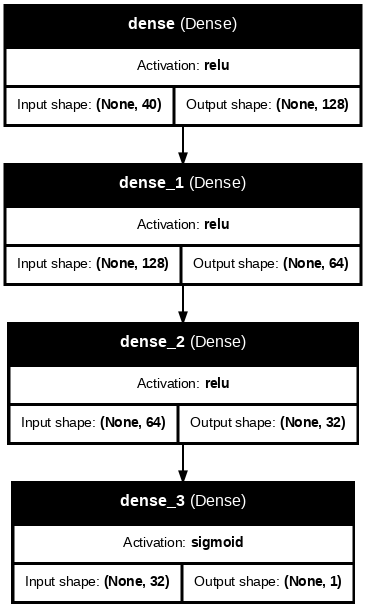

In [ ]:
!pip install graphviz
from tensorflow.keras.utils import plot_model
plot_model(model_sgd, to_file='sgd.png', show_shapes = True, show_layer_names = True,dpi=72, show_layer_activations=True)
from IPython.display import Image
Image(filename='sgd.png')

In [ ]:
for key in out_model_sgd.history.keys():
  val = out_model_sgd.history[key]
  print(f'History {key}: {val}')

History AUC: [0.7398353219032288, 0.8932285308837891, 0.9260035753250122, 0.9378436207771301, 0.9430269598960876, 0.9467649459838867, 0.949348509311676, 0.9513587355613708, 0.9530126452445984, 0.9538756608963013, 0.9552154541015625, 0.9561500549316406, 0.9576362371444702, 0.9577382802963257, 0.9582544565200806, 0.9592682719230652, 0.9590322375297546, 0.9602456092834473, 0.960777997970581, 0.9614283442497253, 0.9626513123512268, 0.9635177850723267, 0.9652381539344788, 0.9653103351593018, 0.965644359588623, 0.966366171836853, 0.9672675728797913, 0.9682829976081848, 0.9689648747444153, 0.9696977138519287, 0.970839262008667, 0.9716516733169556, 0.9726412296295166, 0.9741795659065247, 0.9740980863571167, 0.974912703037262, 0.9751162528991699, 0.9765729904174805, 0.9782748818397522, 0.9787327647209167, 0.9791980981826782, 0.979383647441864, 0.9798064827919006, 0.9799551367759705, 0.9801645278930664, 0.9808251261711121, 0.9812271595001221, 0.9824120998382568, 0.9826105833053589, 0.98277020454

In [ ]:
sgd_modle_loss,sgd_modle_accuracy,sgd_modle_precision,sgd_modle_recall,sgd_modle_auc = model_sgd.evaluate(Feature_Test, Target_Test)
print(f'SGD Model Loss: {sgd_modle_loss}')

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.8892 - Precision: 0.5695 - Recall: 0.7937 - accuracy: 0.9587 - loss: 0.2069
SGD Model Loss: 0.21317829191684723


# Hyperparameter Tuning


In [21]:
def classWeightCalculation():
  cal_class_weight = compute_class_weight(class_weight='balanced',
                                          classes = np.unique(Target_Train), y=Target_Train)
  dict_class_weight = dict(enumerate(cal_class_weight))
  return dict_class_weight


dict_classWeight = classWeightCalculation()
print(dict_classWeight)

{0: 0.5295382165605096, 1: 8.963611859838275}


In [22]:
for iteration in range(1,4):
  print(iteration)

1
2
3


In [25]:
class NNHyperParameterTuning:
  def __init__(self,feat_dim):
    self.feature_dimension = feat_dim
    self.weight_list = ['he_normal','he_uniform','glorot_normal','glorot_uniform','random_normal','random_uniform']
    self.activation = ['relu','tanh','sigmoid']
    self.optimizer = ['adam','sgd','rmsprop']
    self.lossfunc = ['binary_crossentropy','hinge','mean_squared_error']

  def AddingDenseLayer(self, model, units, activation, regularizer, weight, input_dimension = None):
    if input_dimension == None:
      model.add(Dense(units=units, activation= activation, kernel_regularizer= regularizer, kernel_initializer = weight, input_dim = input_dimension))
    else:
      model.add(Dense(units=units, activation= activation, kernel_regularizer= regularizer, kernel_initializer = weight))

    return model


  def WeightInitializing(self,hyper_parameter, iteration):

    weight = hyper_parameter.Choice(f'weight_{iteration}',self.weight_list)
    intializers = {
                      'he_normal': tf.keras.initializers.HeNormal(),
                      'he_uniform':tf.keras.initializers.he_uniform(),
                      'glorot_normal':tf.keras.initializers.glorot_normal(),
                      'glorot_uniform':tf.keras.initializers.glorot_uniform(),
                      'random_normal':tf.keras.initializers.random_normal(),
                      'random_uniform':tf.keras.initializers.random_uniform()
                  }
    return intializers[weight]

  def Input_Layer(self, model, hyper_parameter):
    iteration = 1
    weight_init = self.WeightInitializing(hyper_parameter, 'input_layer')
    model = self.AddingDenseLayer(model,
                  units = hyper_parameter.Int('input_layers_'+ str(iteration), min_value=64, max_value=128,step=32),
                  activation = hyper_parameter.Choice('input_activation_'+str(iteration), self.activation),
                  regularizer = tf.keras.regularizers.l1_l2(
                         l1=hyper_parameter.Float(f'input_L1_{str(iteration)}', min_value = 0.01, max_value = 0.1, step = 0.01),
                        l2=hyper_parameter.Float(f'Input_L2_{str(iteration)}', min_value = 0.01, max_value = 0.1, step = 0.01)),
                  weight = weight_init,
                  input_dimension = self.feature_dimension
                                )
    model.add(BatchNormalization())
    model.add(Dropout(rate=hyper_parameter.Float('rate_Dropout_'+str(iteration),min_value=0.1, max_value = 0.5, step = 0.1)))

    return model

  def AddingHiddenLayer(self,model, hyper_parameter):
    for iteration in range(2, hyper_parameter.Int('hidden_layer_',2,4)):
      weight_init = self.WeightInitializing(hyper_parameter,iteration)
      model = self.AddingDenseLayer(model,
                      units = hyper_parameter.Int('hidden_units_'+ str(iteration), min_value=32, max_value=128,step=32),
                      activation = hyper_parameter.Choice('hidden_activation_'+str(iteration), self.activation),
                      regularizer = tf.keras.regularizers.l1_l2(
                          l1=hyper_parameter.Float(f'L1_{str(iteration)}', min_value = 0.01, max_value = 0.1, step = 0.01),
                          l2=hyper_parameter.Float(f'L2_{str(iteration)}', min_value = 0.01, max_value = 0.1, step = 0.01)),
                      weight = weight_init
                                    )
      model.add(BatchNormalization())
      model.add(Dropout(rate=hyper_parameter.Float('hidden_Dropout_'+str(iteration),min_value=0.1, max_value = 0.5, step = 0.1)))

    return model



  def Get_Optimizer(self, model, hyper_parameter):
    optimizer = hyper_parameter.Choice('optimizer', self.optimizer )
    rate_of_learning = hyper_parameter.Float('learning_rate',min_value=1e-4, max_value = 1e-3, sampling = 'LOG')
    optimizer_choice ={
                        'adam': Adam(learning_rate = rate_of_learning),
                        'sgd': SGD(learning_rate = rate_of_learning),
                        'rmsprop': RMSprop(learning_rate = rate_of_learning)
                      }
    return optimizer_choice[optimizer]

  def AddOutputLayer(self, model, hyper_parameter):
    model.add(Dense(1, activation='sigmoid',
              kernel_initializer = self.WeightInitializing(hyper_parameter,'output_layer'),
              kernel_regularizer = tf.keras.regularizers.l1_l2(
                      l1=hyper_parameter.Float('L1_output', min_value = 0.01, max_value = 0.1, step = 0.01),
                      l2=hyper_parameter.Float('L2_output', min_value = 0.01, max_value = 0.1, step = 0.01))
              ))
    return model


  def BuildModel(self,hyper_parameter):
    tf.random.set_seed(42)
    ## Initializing Sequential
    model_HT = Sequential()

    ## Input Layer
    model_HT = self.Input_Layer(model_HT, hyper_parameter)

    ## Hidden Layer
    model_HT = self.AddingHiddenLayer(model_HT, hyper_parameter)

    ## Output layer
    model_HT = self.AddOutputLayer(model_HT, hyper_parameter)

    ##Optimizer
    optimizer = self.Get_Optimizer(model_HT, hyper_parameter)


    model_HT.compile(optimizer = optimizer,
                      loss =hyper_parameter.Choice('loss',self.lossfunc),
                      metrics = ['accuracy', Precision(), Recall(),AUC()]
                      )


    return model_HT

ObjHT =NNHyperParameterTuning(Feature_Train_Scaled.shape[1])

# Metrics Calculation and Plot

In [24]:
class Metrics:

  def Metrics_Calculation(self, model, feature, target, hy_method, datasettype):
    predict_probability = model.predict(feature)
    prc_precision, prc_recall, prc_threshold = precision_recall_curve(target, predict_probability)
    prc_f1score = 2*(( prc_precision * prc_recall ) / ( prc_precision + prc_recall ))
    print(f'prc_precision: {prc_precision} \n prc_recall: {prc_recall} \n prc_threshold: {prc_threshold} \n prc_f1score: {prc_f1score}')



    prc_threshold_idmx = np.argmax(prc_f1score)
    prc_best_thershold = prc_threshold[prc_threshold_idmx]
    print(f'best threshold: {prc_best_thershold}')

    predict_prob_threshold = ( predict_probability > prc_best_thershold ).astype(int)
    ##predict_prob_threshold = ( predict_probability > 0.5 ).astype(int)
    accuracy = accuracy_score( target, predict_prob_threshold )
    precision = precision_score( target , predict_prob_threshold )
    recall = recall_score( target, predict_prob_threshold )
    f1score = f1_score(target, predict_prob_threshold)
    conf_matrix = confusion_matrix( target, predict_prob_threshold )
    class_report = classification_report( target, predict_prob_threshold )
    print(f'Classification Report: {class_report}')
    self.ConfusionMatrix_plot(conf_matrix,hy_method)

    false_positive, true_positive, threshold = roc_curve( target,predict_prob_threshold )
    roc_auc = auc(false_positive, true_positive)

    self.Plot_rocauc_curve(false_positive, true_positive, roc_auc,datasettype+'_'+hy_method)



    df_Metrics = pd.DataFrame({ 'Dataset':[datasettype], 'HyperTune':[hy_method], 'Accuracy':[accuracy],
                              'Precision':[precision], 'Recall':[recall], 'F1-Score':[f1score],
                               'ROC_AUC':[roc_auc]
                          })
    return df_Metrics




  def ConfusionMatrix_plot(self, conf_matrix,hy_type):
    lbl = ['TN', 'FP', 'FN', 'TP']
    cnf_lbl = ['\n{0:0.0f}'.format(cnf_val) for cnf_val in conf_matrix.flatten()]
    cn_percentage = ["\n{0:.2%}".format(item/conf_matrix.flatten().sum()) for item in conf_matrix.flatten()]

    confusion_label = np.asarray([["\n {0:0.0f}".format(item)+"\n{0:.2%}".format(item/conf_matrix.flatten().sum())]
                                for item in conf_matrix.flatten()]).reshape(2,2)

    cnf_label = np.asarray([f'{lbl1} {lbl2} {lbl3}' for lbl1, lbl2, lbl3 in zip(lbl, cnf_lbl,  cn_percentage)]).reshape(2,2)

    plt.figure(figsize = (3,3))
    sns.heatmap(conf_matrix, annot = cnf_label, cmap = 'Spectral', fmt='' )
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{hy_type} confusion matrix')
    plt.tight_layout()
    plt.show()

  def Plot_rocauc_curve(self, fpr, tpr, rocauc, hy_type):
    plt.figure(figsize = (5,5))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC= {rocauc: .2f})')
    plt.plot([0,1],[0,1], color='green', linestyle='--',lw=3)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC AUC CURVE {hy_type}')
    plt.legend(loc = 'lower right')
    plt.tight_layout()
    plt.show()


  def Metrics_Plot(self,best_model, hy_type, df_type):
    header_metrics = ['loss','accuracy','precision', 'recall']
    model_history = best_model.history

    plt.figure(figsize = (5,5))
    for indx, mtr in enumerate(header_metrics):
      plt.subplot(2,2, indx+1)
      plt.plot(model_history.history[mtr], label=f'{df_type} {mtr}')
      plt.plot(model_history.history[f'val_{mtr}'], label=f'Val_{mtr}')
      plt.xlabel('Epochs')
      plt.ylabel(mtr)
      plt.title(f'{hy_type} {mtr}')

    plt.tight_layout()
    plt.show()




ObjMetrics = Metrics()

# Randomised Search Hypertuning

In [59]:

##dict_classWeight = {0:1,1:2}
tf.random.set_seed(42)
#f1_metric_Obj = Objective('val_f1_metric', direction='max')
Precision_Obj = Objective('val_precision', direction='max')
recall_Obj = Objective('val_recall', direction='max')
accuracy_Obj = Objective('val_accuracy', direction='max')
random_tuner = RandomSearch(ObjHT.BuildModel, objective=[Precision_Obj,recall_Obj,accuracy_Obj],
                            max_trials = 3, executions_per_trial = 1, directory = 'ReneWind',
                            project_name = 'RandomSearch_HyperTune_3L_04')

stop_early = EarlyStopping(monitor = 'val_loss', patience= 7, restore_best_weights=True)
lr_reducing = ReduceLROnPlateau(monitor = 'val_loss', patience=4, factor=0.2, min_lr= 1e-6)

result_search = random_tuner.search(Feature_Train_Scaled, Target_Train, epochs=150, validation_split = 0.2,
                                    callbacks=[stop_early,lr_reducing],verbose=1,shuffle = True,
                                    class_weight = dict_classWeight,batch_size=32)


Trial 3 Complete [00h 10m 23s]
multi_objective: -2.0312561690807343

Best multi_objective So Far: -2.209804892539978
Total elapsed time: 00h 21m 04s


In [60]:
best_hyperparameter = random_tuner.get_best_hyperparameters(num_trials=6)
best_hyperparameter

In [61]:
best_hyperparameter = random_tuner.get_best_hyperparameters(num_trials=6)

for bst_hyp in best_hyperparameter:
  for key,value in bst_hyp.values.items():

    print(f'{key}:{value}')
  print('-'*100)
hyp_list = []
for hp in best_hyperparameter:
  hyp_list.append(hp.values)

df_hyp = pd.DataFrame(hyp_list)


ip_weight_1:random_normal
input_layers_1:96
input_activation_1:tanh
input_L1_1:0.04
Input_L2_1:0.06999999999999999
rate_Dropout_1:0.2
hidden_layer_:3
ip_weight_output_layer:he_normal
L1_output:0.01
L2_output:0.05
optimizer:adam
learning_rate:0.00016039281622507533
loss:mean_squared_error
ip_weight_2:he_normal
hidden_units_2:32
hidden_activation_2:relu
L1_2:0.01
L2_2:0.01
hidden_Dropout_2:0.1
----------------------------------------------------------------------------------------------------
ip_weight_1:random_normal
input_layers_1:128
input_activation_1:tanh
input_L1_1:0.02
Input_L2_1:0.060000000000000005
rate_Dropout_1:0.4
hidden_layer_:4
ip_weight_output_layer:random_normal
L1_output:0.04
L2_output:0.09
optimizer:sgd
learning_rate:0.0004572062135223556
loss:hinge
ip_weight_2:glorot_normal
hidden_units_2:64
hidden_activation_2:tanh
L1_2:0.09
L2_2:0.03
hidden_Dropout_2:0.1
ip_weight_3:he_normal
hidden_units_3:32
hidden_activation_3:relu
L1_3:0.01
L2_3:0.01
hidden_Dropout_3:0.1
--------

In [62]:
df_hyp.T

,0,1,2
ip_weight_1,random_normal,random_normal,he_uniform
input_layers_1,96,128,64
input_activation_1,tanh,tanh,relu
input_L1_1,0.04,0.02,0.08
Input_L2_1,0.07,0.06,0.08
rate_Dropout_1,0.2,0.4,0.5
hidden_layer_,3,4,2
ip_weight_output_layer,he_normal,random_normal,glorot_normal
L1_output,0.01,0.04,0.02
L2_output,0.05,0.09,0.1


In [63]:
stop_early = EarlyStopping(monitor = 'val_loss', patience= 4, restore_best_weights=True)
lr_reducing = ReduceLROnPlateau(monitor = 'val_loss', patience=4, factor=0.2, min_lr= 1e-6)
RndmSearch_Best_Model_Fit = []
for hyp in best_hyperparameter:
  model = ObjHT.BuildModel(hyp)
  model.fit(Feature_Train_Scaled, Target_Train, epochs = 100,
            validation_split = 0.2,callbacks = [stop_early, lr_reducing],
            class_weight = dict_classWeight, verbose =1,
            batch_size = 32, shuffle=True)
  RndmSearch_Best_Model_Fit.append(model)


Epoch 1/100
499/499 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.5754 - auc_3: 0.7311 - loss: 9.3055 - precision_3: 0.0953 - recall_3: 0.7618 - val_accuracy: 0.8527 - val_auc_3: 0.9447 - val_loss: 4.2419 - val_precision_3: 0.2731 - val_recall_3: 0.9103 - learning_rate: 1.6039e-04
Epoch 2/100
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7312 - auc_3: 0.8956 - loss: 3.4737 - precision_3: 0.1606 - recall_3: 0.8864 - val_accuracy: 0.8970 - val_auc_3: 0.9462 - val_loss: 1.9169 - val_precision_3: 0.3503 - val_recall_3: 0.8846 - learning_rate: 1.6039e-04
Epoch 3/100
499/499 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7920 - auc_3: 0.9061 - loss: 1.6663 - precision_3: 0.1955 - recall_3: 0.8579 - val_accuracy: 0.8862 - val_auc_3: 0.9489 - val_loss: 1.0206 - val_precision_3: 0.3292 - val_recall_3: 0.9060 - learning_rate: 1.6039e-04
Epoch 4/100
499/499 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8215 - auc_3: 0.8989 - loss: 0.8994 - precision_3: 0.2226 - recall_3: 0.8636 - val_a

In [83]:
RS_best_model = random_tuner.get_best_models(num_models=6)



/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 20 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 8 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model_0 Metrics Evaluation
624/624 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
prc_precision: [0.05578109 0.05578388 0.05578668 ... 1.         1.         1.        ] 
 prc_recall: [1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 1.79694519e-03
 8.98472597e-04 0.00000000e+00] 
 prc_threshold: [0.17826235 0.17834373 0.1783853  ... 0.99518466 0.99610287 0.99872243] 
 prc_f1score: [0.1056679  0.10567292 0.10567793 ... 0.00358744 0.00179533 0.        ]
best threshold: 0.7221269011497498
Classification Report:               precision    recall  f1-score   support

           0       0.98      0.99      0.98     18840
           1       0.73      0.67      0.70      1113

    accuracy                           0.97     19953
   macro avg       0.85      0.83      0.84     19953
weighted avg       0.97      0.97      0.97     19953



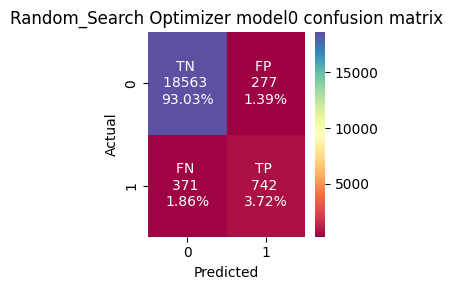

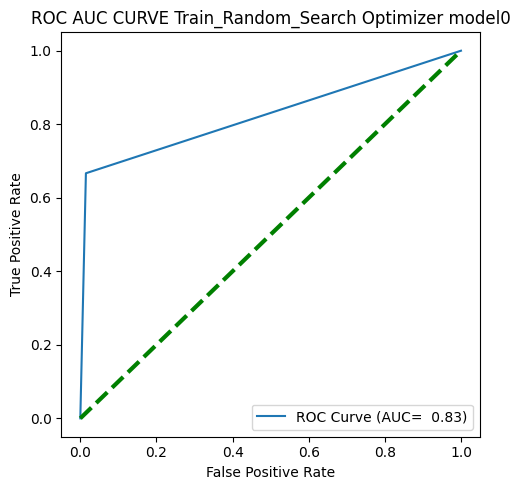

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
prc_precision: [0.0558     0.05581116 0.05582233 ... 1.         1.         1.        ] 
 prc_recall: [1.         1.         1.         ... 0.00716846 0.00358423 0.        ] 
 prc_threshold: [0.17794475 0.17871657 0.17880005 ... 0.9902584  0.99065167 0.9965804 ] 
 prc_f1score: [0.10570184 0.10572186 0.1057419  ... 0.01423488 0.00714286 0.        ]
best threshold: 0.7449965476989746
Classification Report:               precision    recall  f1-score   support

           0       0.98      0.99      0.99      4721
           1       0.84      0.70      0.76       279

    accuracy                           0.98      5000
   macro avg       0.91      0.85      0.87      5000
weighted avg       0.97      0.98      0.97      5000



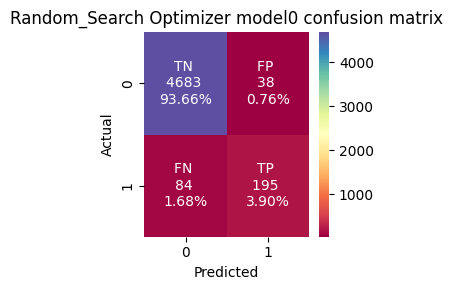

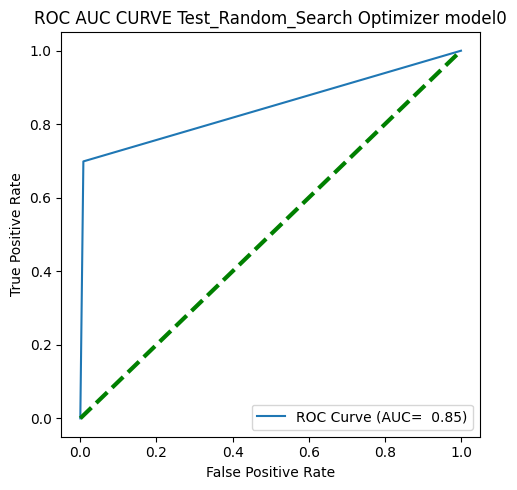

Model_1 Metrics Evaluation
624/624 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
prc_precision: [0.05578109 0.05578388 0.05578668 ... 1.         1.         1.        ] 
 prc_recall: [1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 1.79694519e-03
 8.98472597e-04 0.00000000e+00] 
 prc_threshold: [0.13245806 0.13245814 0.13245815 ... 0.99981374 0.99983466 0.99999064] 
 prc_f1score: [0.1056679  0.10567292 0.10567793 ... 0.00358744 0.00179533 0.        ]
best threshold: 0.9029348492622375
Classification Report:               precision    recall  f1-score   support

           0       0.97      0.98      0.98     18840
           1       0.68      0.56      0.61      1113

    accuracy                           0.96     19953
   macro avg       0.83      0.77      0.80     19953
weighted avg       0.96      0.96      0.96     19953



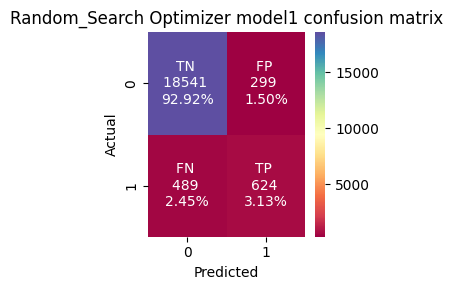

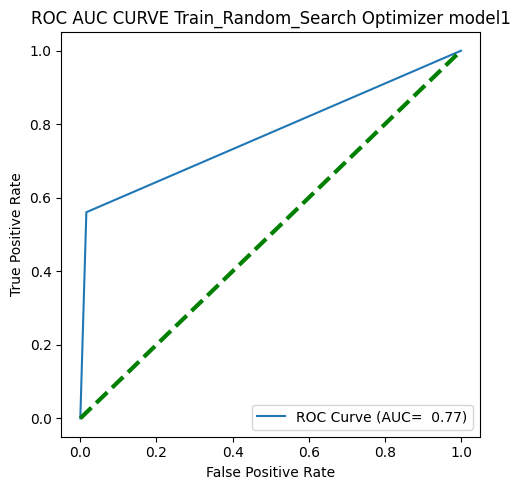

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
prc_precision: [0.0558     0.05581116 0.05584468 ... 1.         1.         1.        ] 
 prc_recall: [1.         1.         1.         ... 0.00716846 0.00358423 0.        ] 
 prc_threshold: [0.13245796 0.13245822 0.13245824 ... 0.99859315 0.9992567  0.99991643] 
 prc_f1score: [0.10570184 0.10572186 0.10578199 ... 0.01423488 0.00714286 0.        ]
best threshold: 0.912436306476593
Classification Report:               precision    recall  f1-score   support

           0       0.98      0.99      0.98      4721
           1       0.77      0.61      0.68       279

    accuracy                           0.97      5000
   macro avg       0.87      0.80      0.83      5000
weighted avg       0.97      0.97      0.97      5000



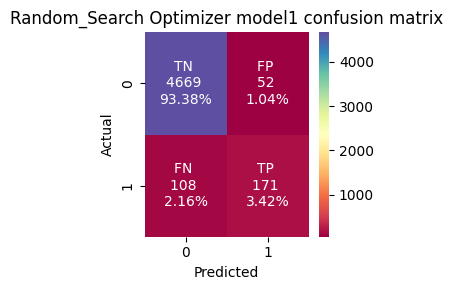

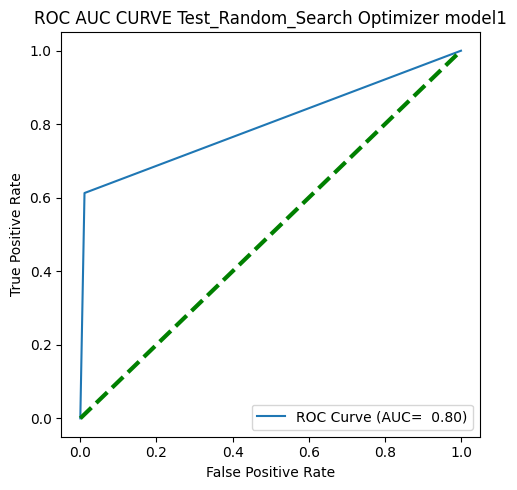

Model_2 Metrics Evaluation
624/624 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
prc_precision: [0.05578109 0.05578388 0.05578668 ... 1.         1.         1.        ] 
 prc_recall: [1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 1.79694519e-03
 8.98472597e-04 0.00000000e+00] 
 prc_threshold: [0.1476574  0.14881997 0.15022008 ... 0.99418426 0.9974192  0.997586  ] 
 prc_f1score: [0.1056679  0.10567292 0.10567793 ... 0.00358744 0.00179533 0.        ]
best threshold: 0.8526219129562378
Classification Report:               precision    recall  f1-score   support

           0       0.98      0.97      0.97     18840
           1       0.53      0.60      0.56      1113

    accuracy                           0.95     19953
   macro avg       0.75      0.78      0.77     19953
weighted avg       0.95      0.95      0.95     19953



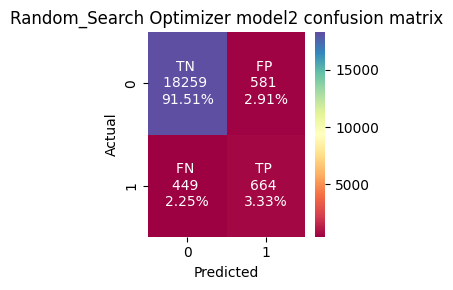

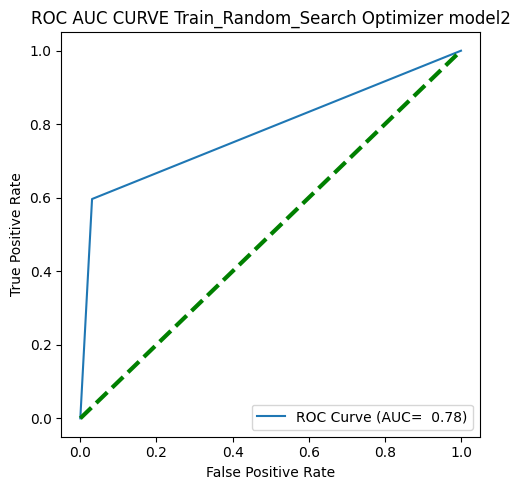

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
prc_precision: [0.0558     0.05581116 0.05582233 ... 1.         1.         1.        ] 
 prc_recall: [1.         1.         1.         ... 0.00716846 0.00358423 0.        ] 
 prc_threshold: [0.14638965 0.1468183  0.14813292 ... 0.9890417  0.9930123  0.9944794 ] 
 prc_f1score: [0.10570184 0.10572186 0.1057419  ... 0.01423488 0.00714286 0.        ]
best threshold: 0.879310667514801
Classification Report:               precision    recall  f1-score   support

           0       0.98      0.98      0.98      4721
           1       0.68      0.58      0.63       279

    accuracy                           0.96      5000
   macro avg       0.83      0.78      0.80      5000
weighted avg       0.96      0.96      0.96      5000



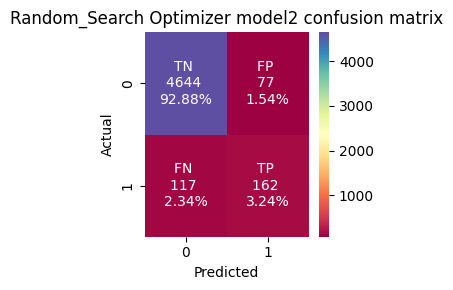

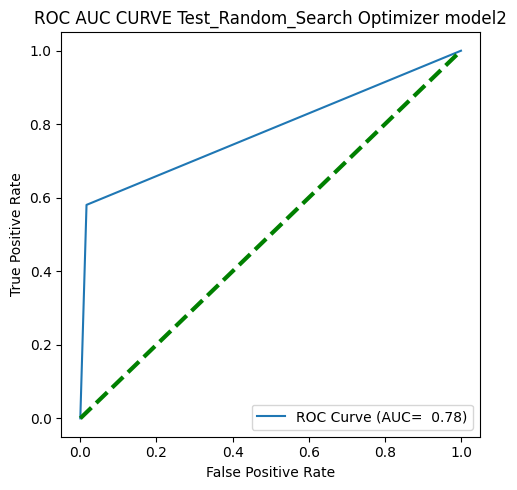

In [65]:
df_Rs_Best_Train = pd.DataFrame()
df_Rs_Best_Test = pd.DataFrame()
for indx, model_bst in enumerate(RndmSearch_Best_Model_Fit):
  print(f'Model_{indx} Metrics Evaluation')
  df_Rs_Best_Train = pd.concat([df_Rs_Best_Train, ObjMetrics.Metrics_Calculation
                        (model_bst, Feature_Train_Scaled, Target_Train, f'Random_Search Optimizer model{indx}','Train')], ignore_index=True )
  df_Rs_Best_Test = pd.concat( [df_Rs_Best_Test, ObjMetrics.Metrics_Calculation
                        (model_bst, Feature_Test_Scaled, Target_Test, f'Random_Search Optimizer model{indx}','Test')], ignore_index=True )

In [66]:
df_Rs_Best_Train

,Dataset,HyperTune,Accuracy,Precision,Recall,F1-Score,ROC_AUC
0,Train,Random_Search Optimizer model0,0.967524,0.728165,0.666667,0.696060,0.825982
1,Train,Random_Search Optimizer model1,0.960507,0.676056,0.560647,0.612967,0.772388
2,Train,Random_Search Optimizer model2,0.948379,0.533333,0.596586,0.563189,0.782874


In [67]:
df_Rs_Best_Test

,Dataset,HyperTune,Accuracy,Precision,Recall,F1-Score,ROC_AUC
0,Test,Random_Search Optimizer model0,0.9756,0.836910,0.698925,0.761719,0.845438
1,Test,Random_Search Optimizer model1,0.9680,0.766816,0.612903,0.681275,0.800944
2,Test,Random_Search Optimizer model2,0.9612,0.677824,0.580645,0.625483,0.782168


# Hyperband

In [ ]:
dict_classWeight = classWeightCalculation()

hyperband_Tuner = Hyperband(ObjHT.BuildModel, objective=['val_precision','val_recall','val_auc'],
                            max_epochs = 100, executions_per_trial = 1, directory = 'ReneWind', project_name = 'HyperBand_Tuning',factor=2 )
stop_early = EarlyStopping(monitor = 'val_loss', patience= 10, restore_best_weights=True)
lr_reducing = ReduceLROnPlateau(monitor = 'val_loss', patience=4, factor=0.2, min_lr= 1e-6)

hyperband_Tuner.search(Feature_Train_Scaled, Target_Train, epochs=100, validation_split = 0.2, callbacks=[stop_early,lr_reducing],verbose=1,class_weight = dict_classWeight)


# Bayseian Search

In [ ]:
dict_classWeight = classWeightCalculation()
print(dict_classWeight)

Bay_Tuner = BayesianOptimization(ObjHT.BuildModel,objective=['val_precision','val_recall','val_auc'],
                                 max_trials=100, directory = 'ReneWind', project_name = 'Bayesian_Tuning_13_Feb_01')

stop_early = EarlyStopping(monitor = 'val_loss', patience= 6, restore_best_weights=True)
lr_reducing = ReduceLROnPlateau(monitor = 'val_loss', patience=4, factor=0.2, min_lr= 1e-6)

Bay_Tuner.search(Feature_Train_Scaled, Target_Train, epochs=150, validation_split = 0.1,
                 callbacks=[stop_early,lr_reducing],verbose=1,class_weight = dict_classWeight,batch_size=32)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



{0: 0.5295382165605096, 1: 8.963611859838275}
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-26-c778962979e8>", line 4, in <cell line: 0>
    Bay_Tuner = BayesianOptimization(ObjHT.BuildModel,objective=['val_precision','val_recall','val_auc'],
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/keras_tuner/src/tuners/bayesian.py", line 394, in __init__
    super().__init__(oracle=oracle, hypermodel=hypermodel, **kwargs)
  File "/usr/local/lib/python3.11/dist-packages/keras_tuner/src/engine/tuner.py", line 122, in __init__
    super().__init__(
  File "/usr/local/lib/python3.11/dist-packages/keras_tuner/src/engine/base_tuner.py", line 127, in __init__
    if not overwrite and backend.io.exists(self._get_tuner_fname()):

In [69]:
bay_best_hyperparameter = Bay_Tuner.get_best_hyperparameters(num_trials=6)

for bst_hyp in bay_best_hyperparameter:
  for key,value in bst_hyp.values.items():

    print(f'{key}:{value}')
  print('-'*100)
bay_hyp_list = []
for hp in best_hyperparameter:
  bay_hyp_list.append(hp.values)

bay_df_hyp = pd.DataFrame(hyp_list)

weight_input_layer:he_normal
input_layers_1:128
input_activation_1:relu
input_L1_1:0.060000000000000005
Input_L2_1:0.02
rate_Dropout_1:0.5
hidden_layer_:3
weight_output_layer:glorot_uniform
L1_output:0.03
L2_output:0.09999999999999999
optimizer:rmsprop
learning_rate:0.0008150279499503775
loss:binary_crossentropy
weight_2:he_normal
hidden_units_2:32
hidden_activation_2:relu
L1_2:0.01
L2_2:0.01
hidden_Dropout_2:0.1
----------------------------------------------------------------------------------------------------
weight_input_layer:glorot_uniform
input_layers_1:96
input_activation_1:relu
input_L1_1:0.05
Input_L2_1:0.09999999999999999
rate_Dropout_1:0.1
hidden_layer_:3
weight_output_layer:glorot_uniform
L1_output:0.05
L2_output:0.06999999999999999
optimizer:sgd
learning_rate:0.00020765990193567994
loss:mean_squared_error
weight_2:random_normal
hidden_units_2:32
hidden_activation_2:sigmoid
L1_2:0.01
L2_2:0.01
hidden_Dropout_2:0.4
-----------------------------------------------------------

In [71]:
bay_df_hyp.T

,0,1,2
ip_weight_1,random_normal,random_normal,he_uniform
input_layers_1,96,128,64
input_activation_1,tanh,tanh,relu
input_L1_1,0.04,0.02,0.08
Input_L2_1,0.07,0.06,0.08
rate_Dropout_1,0.2,0.4,0.5
hidden_layer_,3,4,2
ip_weight_output_layer,he_normal,random_normal,glorot_normal
L1_output,0.01,0.04,0.02
L2_output,0.05,0.09,0.1


In [72]:
stop_early = EarlyStopping(monitor = 'val_loss', patience= 4, restore_best_weights=True)
lr_reducing = ReduceLROnPlateau(monitor = 'val_loss', patience=4, factor=0.2, min_lr= 1e-6)
Bay_Best_Model_Fit = []
for hyp in bay_best_hyperparameter:
  model = ObjHT.BuildModel(hyp)
  model.fit(Feature_Train_Scaled, Target_Train, epochs = 100,
            validation_split = 0.2,callbacks = [stop_early, lr_reducing],
            class_weight = dict_classWeight, verbose =1,
            batch_size = 32, shuffle=True)
  Bay_Best_Model_Fit.append(model)


Epoch 1/100
499/499 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6148 - auc_3: 0.7752 - loss: 40.2724 - precision_3: 0.1095 - recall_3: 0.7868 - val_accuracy: 0.9584 - val_auc_3: 0.9476 - val_loss: 2.8515 - val_precision_3: 0.9857 - val_recall_3: 0.2949 - learning_rate: 8.1503e-04
Epoch 2/100
499/499 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8499 - auc_3: 0.8974 - loss: 1.6848 - precision_3: 0.2522 - recall_3: 0.8403 - val_accuracy: 0.8642 - val_auc_3: 0.9145 - val_loss: 0.8684 - val_precision_3: 0.2755 - val_recall_3: 0.8077 - learning_rate: 8.1503e-04
Epoch 3/100
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8731 - auc_3: 0.8830 - loss: 0.7826 - precision_3: 0.2784 - recall_3: 0.7785 - val_accuracy: 0.8639 - val_auc_3: 0.9011 - val_loss: 0.7664 - val_precision_3: 0.2764 - val_recall_3: 0.8162 - learning_rate: 8.1503e-04
Epoch 4/100
499/499 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8740 - auc_3: 0.8875 - loss: 0.7424 - precision_3: 0.2816 - recall_3: 0.7797 - val_

Model_0 Metrics Evaluation
624/624 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
prc_precision: [0.05578109 0.05578388 0.05578668 ... 1.         1.         1.        ] 
 prc_recall: [1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 1.79694519e-03
 8.98472597e-04 0.00000000e+00] 
 prc_threshold: [0.09828563 0.09898096 0.0998745  ... 0.9998027  0.9998124  0.99998546] 
 prc_f1score: [0.1056679  0.10567292 0.10567793 ... 0.00358744 0.00179533 0.        ]
best threshold: 0.7953423857688904
Classification Report:               precision    recall  f1-score   support

           0       0.98      0.99      0.98     18840
           1       0.77      0.69      0.72      1113

    accuracy                           0.97     19953
   macro avg       0.87      0.84      0.85     19953
weighted avg       0.97      0.97      0.97     19953



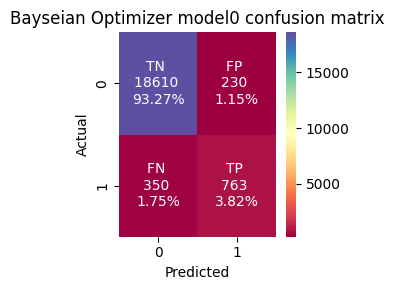

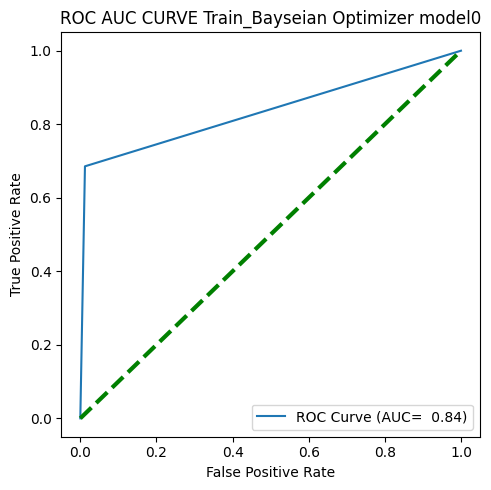

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
prc_precision: [0.0558     0.05581116 0.05582233 ... 1.         1.         1.        ] 
 prc_recall: [1.         1.         1.         ... 0.00716846 0.00358423 0.        ] 
 prc_threshold: [0.10187634 0.10218599 0.10223802 ... 0.9992998  0.9996138  0.99992675] 
 prc_f1score: [0.10570184 0.10572186 0.1057419  ... 0.01423488 0.00714286 0.        ]
best threshold: 0.8320636749267578
Classification Report:               precision    recall  f1-score   support

           0       0.98      0.99      0.99      4721
           1       0.86      0.68      0.76       279

    accuracy                           0.98      5000
   macro avg       0.92      0.84      0.87      5000
weighted avg       0.97      0.98      0.97      5000



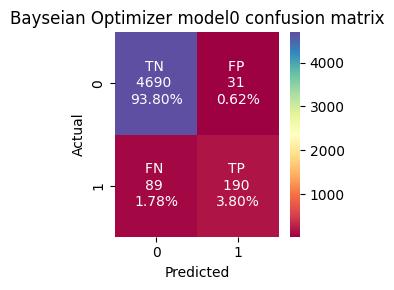

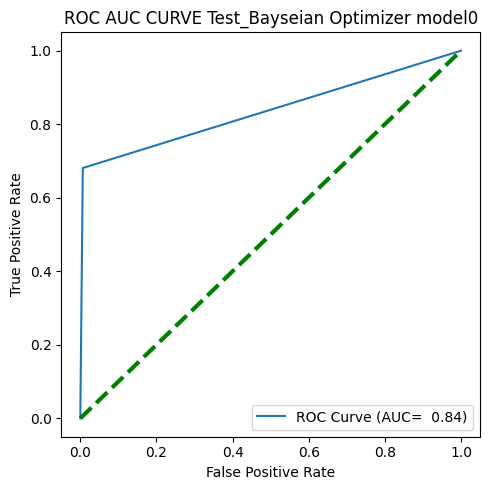

Model_1 Metrics Evaluation
624/624 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
prc_precision: [0.05578109 0.05578388 0.05578668 ... 1.         1.         1.        ] 
 prc_recall: [1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 1.79694519e-03
 8.98472597e-04 0.00000000e+00] 
 prc_threshold: [0.3394906  0.33949107 0.33949128 ... 0.96164125 0.96304697 0.9830559 ] 
 prc_f1score: [0.1056679  0.10567292 0.10567793 ... 0.00358744 0.00179533 0.        ]
best threshold: 0.6768972873687744
Classification Report:               precision    recall  f1-score   support

           0       0.98      0.98      0.98     18840
           1       0.68      0.59      0.63      1113

    accuracy                           0.96     19953
   macro avg       0.83      0.79      0.80     19953
weighted avg       0.96      0.96      0.96     19953



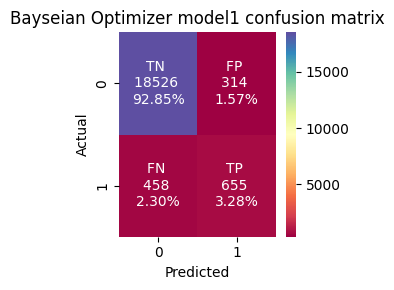

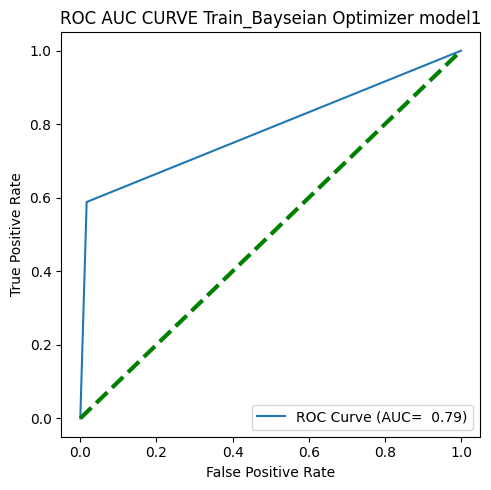

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
prc_precision: [0.0558     0.05581116 0.05582233 ... 1.         1.         1.        ] 
 prc_recall: [1.         1.         1.         ... 0.00716846 0.00358423 0.        ] 
 prc_threshold: [0.3394926  0.3395024  0.33950564 ... 0.925418   0.9314077  0.9678416 ] 
 prc_f1score: [0.10570184 0.10572186 0.1057419  ... 0.01423488 0.00714286 0.        ]
best threshold: 0.7031252384185791
Classification Report:               precision    recall  f1-score   support

           0       0.98      0.99      0.98      4721
           1       0.82      0.59      0.69       279

    accuracy                           0.97      5000
   macro avg       0.90      0.79      0.84      5000
weighted avg       0.97      0.97      0.97      5000



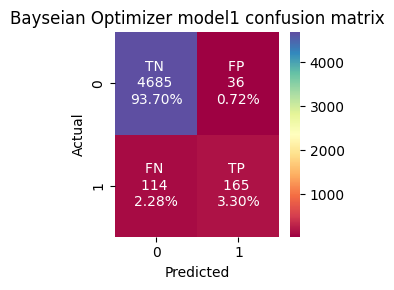

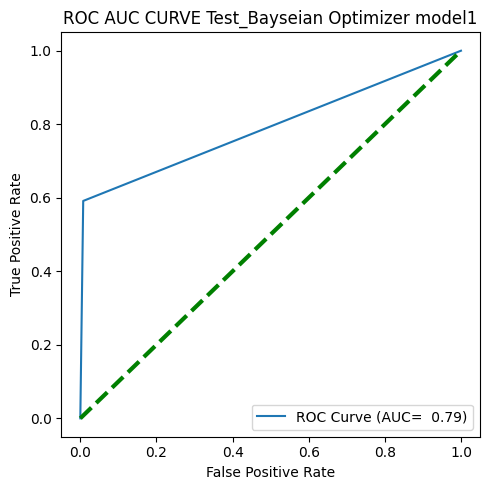

Model_2 Metrics Evaluation
624/624 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
prc_precision: [0.05578109 0.05578388 0.05578668 ... 1.         1.         1.        ] 
 prc_recall: [1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 1.79694519e-03
 8.98472597e-04 0.00000000e+00] 
 prc_threshold: [0.01793035 0.01885355 0.02015179 ... 0.9788538  0.98138094 0.99094516] 
 prc_f1score: [0.1056679  0.10567292 0.10567793 ... 0.00358744 0.00179533 0.        ]
best threshold: 0.7320334315299988
Classification Report:               precision    recall  f1-score   support

           0       0.97      0.98      0.98     18840
           1       0.67      0.56      0.61      1113

    accuracy                           0.96     19953
   macro avg       0.82      0.77      0.80     19953
weighted avg       0.96      0.96      0.96     19953



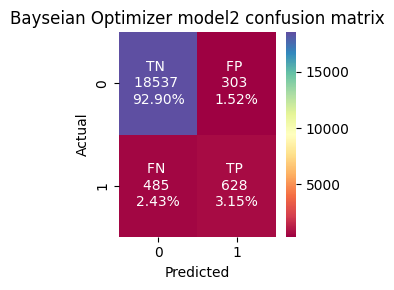

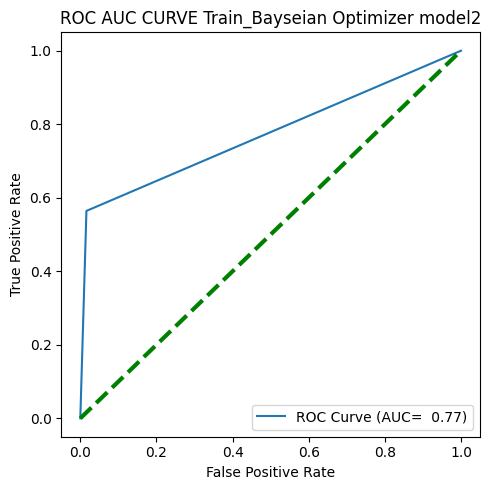

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
prc_precision: [0.0558     0.05581116 0.05582233 ... 1.         1.         1.        ] 
 prc_recall: [1.         1.         1.         ... 0.00716846 0.00358423 0.        ] 
 prc_threshold: [0.01978202 0.02104826 0.02491715 ... 0.95336545 0.95865214 0.9771571 ] 
 prc_f1score: [0.10570184 0.10572186 0.1057419  ... 0.01423488 0.00714286 0.        ]
best threshold: 0.7167181968688965
Classification Report:               precision    recall  f1-score   support

           0       0.98      0.98      0.98      4721
           1       0.69      0.64      0.67       279

    accuracy                           0.96      5000
   macro avg       0.84      0.81      0.82      5000
weighted avg       0.96      0.96      0.96      5000



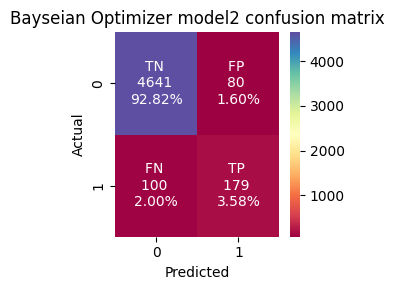

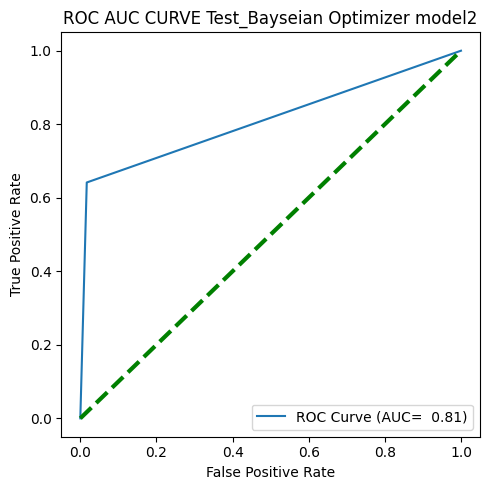

In [73]:
df_bay_Best_Train = pd.DataFrame()
df_bay_Best_Test = pd.DataFrame()
for indx, model_bst in enumerate(Bay_Best_Model_Fit):
  print(f'Model_{indx} Metrics Evaluation')
  df_bay_Best_Train = pd.concat([df_bay_Best_Train, ObjMetrics.Metrics_Calculation
                        (model_bst, Feature_Train_Scaled, Target_Train, f'Bayseian Optimizer model{indx}','Train')], ignore_index=True )
  df_bay_Best_Test = pd.concat( [df_bay_Best_Test, ObjMetrics.Metrics_Calculation
                        (model_bst, Feature_Test_Scaled, Target_Test, f'Bayseian Optimizer model{indx}','Test')], ignore_index=True )

In [74]:
df_bay_Best_Train

,Dataset,HyperTune,Accuracy,Precision,Recall,F1-Score,ROC_AUC
0,Train,Bayseian Optimizer model0,0.970932,0.768379,0.685535,0.724596,0.836663
1,Train,Bayseian Optimizer model1,0.961309,0.675955,0.588500,0.629203,0.785916
2,Train,Bayseian Optimizer model2,0.960507,0.674544,0.564241,0.614481,0.774079


In [75]:
df_bay_Best_Test

,Dataset,HyperTune,Accuracy,Precision,Recall,F1-Score,ROC_AUC
0,Test,Bayseian Optimizer model0,0.976,0.859729,0.681004,0.760000,0.837219
1,Test,Bayseian Optimizer model1,0.970,0.820896,0.591398,0.687500,0.791886
2,Test,Bayseian Optimizer model2,0.964,0.691120,0.641577,0.665428,0.812316
